# Import and Config

In [1]:
import tensorflow as tf
from discofuzz.constants import SIMILARITY_METRICS

# Import DisCoFuzz package classes
from discofuzz.constants import *
from discofuzz.config import *
from discofuzz.WiCDatasetHandler import WiCDatasetHandler
from discofuzz.BaseEmbeddingModel import BaseEmbeddingModel
from discofuzz.DisCoFuzz import DisCoFuzz
from discofuzz.EvalHarness import EvalHarness

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igeek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\igeek\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igeek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU available: {gpus}")

In [ ]:
sample_size = 10000
# Define all available similarity metrics from FourierFuzzifier
sim_metrics_enum = [SIMILARITY_METRICS.COS, SIMILARITY_METRICS.W1, SIMILARITY_METRICS.W2, SIMILARITY_METRICS.Q]
n_components = 64
fuzzification_kernel_size = 16
enrich_lemmas_with_wn = False

# load config vars or defaults
X_train, y_train, X_test, y_test = WiCDatasetHandler.load_dataset(".")
X_train, y_train, X_test, y_test = (
    X_train[:sample_size],
    y_train[:sample_size],
    X_train[:sample_size],  # evaluating space on training set, as training set has more samples and map is nonparametric
    y_train[:sample_size],
    # X_test[:sample_size],
    # y_test[:sample_size]
)
sim_metrics = [s.value for s in sim_metrics_enum]
embedding_model = BaseEmbeddingModel()
model = DisCoFuzz(
    embedding_model,
    enrich_lemmas_with_wn=enrich_lemmas_with_wn
)
eval_harness = EvalHarness(
    sim_metrics=sim_metrics_enum,
    composition_strategies=STRATEGIES,
    embedding_model=embedding_model,
    spacy_model=model.spacy_model,
    fuzzifier=model.lemma_vectorizer.fuzzifier,
)

# Run model

In [4]:
sents = X_test["sent_1"].to_list() + X_test["sent_2"].to_list()
embedding_model.fit_transform(sents)

array([[-0.23388419,  0.02699804,  0.21752098, ...,  0.00776463,
         0.16354536, -0.03483484],
       [ 0.11323401, -0.05645019, -0.00467257, ...,  0.03336552,
        -0.06784686,  0.03564097],
       [ 0.05959126,  0.01208216, -0.06356538, ..., -0.0757369 ,
         0.04376865, -0.00396279],
       ...,
       [-0.25132287, -0.10438244, -0.15129189, ..., -0.00344844,
        -0.08613203,  0.08863828],
       [ 0.3674863 ,  0.11917855, -0.1586346 , ..., -0.11423175,
         0.05330218,  0.02877424],
       [ 0.15859507,  0.14411965,  0.00180229, ..., -0.05295873,
        -0.10571036, -0.11511753]], dtype=float32)

In [5]:
X_test = model.fit(X_test)
X_test = model.predict_batch(X_test, STRATEGIES)

	Composing embeddings with mean approach...
	Composing embeddings with intersection+mean approach...
	Composing embeddings with intersection+union approach...
	Composing embeddings with intersection+intersection approach...
	Composing embeddings with selective_intersection+mean approach...
	Composing embeddings with selective_intersection+union approach...
	Composing embeddings with selective_intersection+intersection+mean approach...


# Evaluate model

In [6]:
eval_harness.fit(X_test)
sims_df = eval_harness.get_similarities(X_test)
sims_df.head()


	=== Computing similarities with cos metric ===
		Getting compositional embedding relatedness scores for baseline_sent approach...
		Getting compositional embedding relatedness scores for baseline_tok approach...
		Getting compositional embedding relatedness scores for intersection+intersection approach...
		Getting compositional embedding relatedness scores for intersection+mean approach...
		Getting compositional embedding relatedness scores for intersection+union approach...
		Getting compositional embedding relatedness scores for mean approach...
		Getting compositional embedding relatedness scores for selective_intersection+intersection+mean approach...
		Getting compositional embedding relatedness scores for selective_intersection+mean approach...
		Getting compositional embedding relatedness scores for selective_intersection+union approach...

	=== Computing similarities with wasserstein-1 metric ===
		Getting compositional embedding relatedness scores for baseline_sent approac

,fuzzy_baseline_sent_cos_sim,fuzzy_baseline_tok_cos_sim,fuzzy_intersection+intersection_cos_sim,fuzzy_intersection+mean_cos_sim,fuzzy_intersection+union_cos_sim,fuzzy_mean_cos_sim,fuzzy_selective_intersection+intersection+mean_cos_sim,fuzzy_selective_intersection+mean_cos_sim,fuzzy_selective_intersection+union_cos_sim,fuzzy_baseline_sent_wasserstein-1_sim,...,fuzzy_baseline_tok_quantum_sim,fuzzy_intersection+intersection_quantum_sim,fuzzy_intersection+mean_quantum_sim,fuzzy_intersection+union_quantum_sim,fuzzy_mean_quantum_sim,fuzzy_selective_intersection+intersection+mean_quantum_sim,fuzzy_selective_intersection+mean_quantum_sim,fuzzy_selective_intersection+union_quantum_sim,baseline_sent_cos_sim,baseline_tok_cos_sim
0,0.185501,0.013030,-0.000157,-0.000343,-0.000157,-0.074372,-0.207056,-0.207056,-0.138198,0.105055,...,0.005386,-0.003519,-0.004845,-0.003519,-0.120744,-0.144360,-0.144360,-0.038682,0.180895,-0.022258
1,0.079004,-0.056384,0.003206,0.004198,0.003206,0.015093,0.038767,0.038767,0.047736,0.110575,...,-0.059913,-0.009949,-0.012430,-0.009949,-0.214253,0.021833,0.021833,0.004200,0.213314,0.046877
2,0.173832,0.000551,0.001086,0.000575,0.001086,-0.112960,-0.061685,-0.061685,-0.045460,0.057084,...,0.003274,-0.005046,-0.000177,-0.005046,-0.101532,-0.010114,-0.010114,-0.001622,0.109506,0.021358
3,-0.255468,-0.007747,0.000463,-0.000836,0.000463,0.235680,0.030621,0.030621,0.034873,-0.056736,...,0.000593,0.003798,0.002515,0.003798,0.234404,0.059042,0.059042,0.022222,-0.295744,-0.027765
4,0.018735,0.044708,0.001740,0.001715,0.001740,-0.026715,-0.238274,-0.238274,-0.162588,0.076609,...,0.042762,-0.001958,-0.003316,-0.001958,-0.017707,-0.248564,-0.248564,-0.074484,0.095034,-0.003355


In [7]:
sim_eval_df = eval_harness.classify_similarities(sims_df)

# Visualizations

## Custom similarities vs cosine similarity in original space

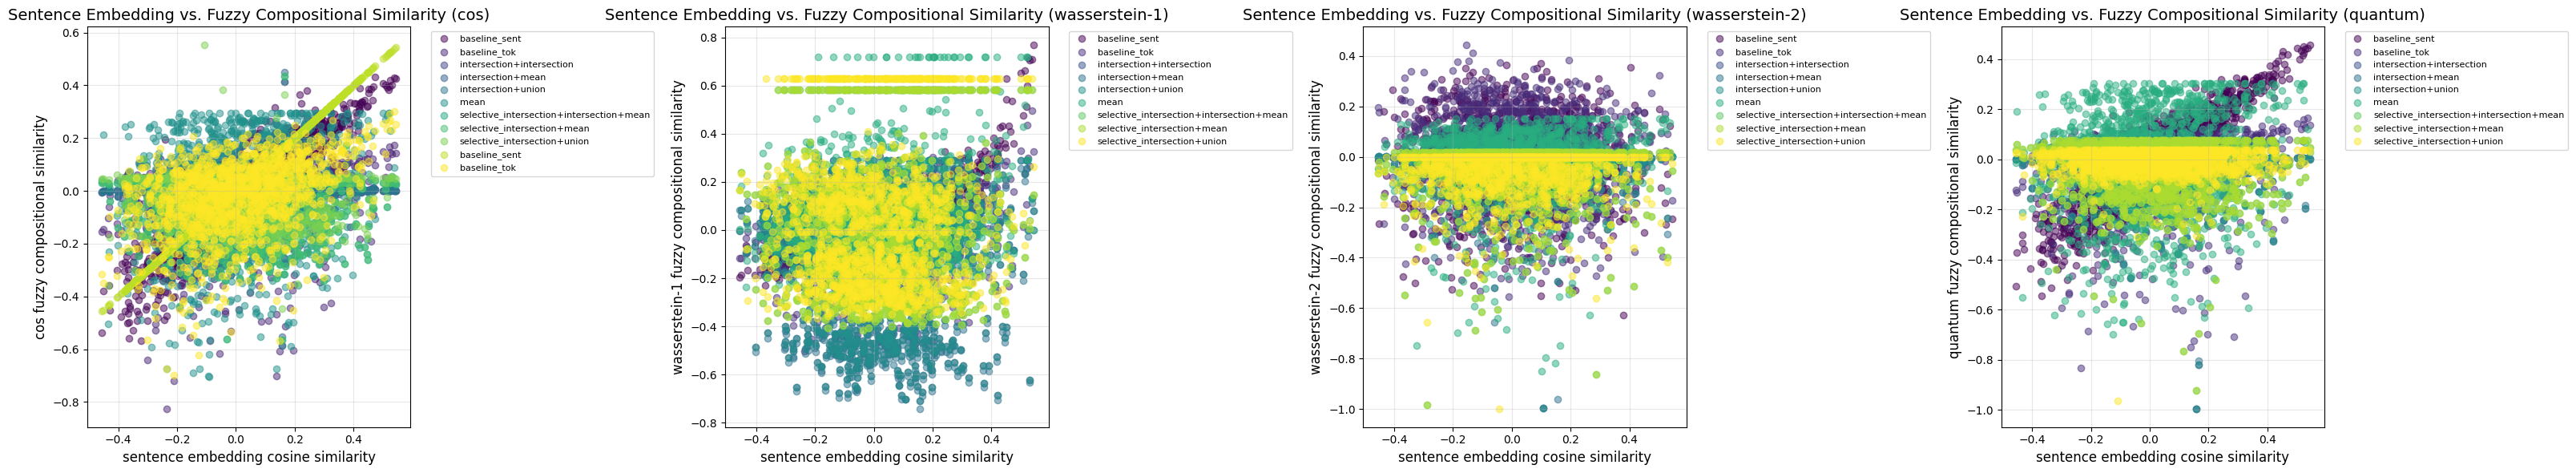

In [8]:
eval_harness.visualize_similarities(sims_df)

## Confusion Matrices

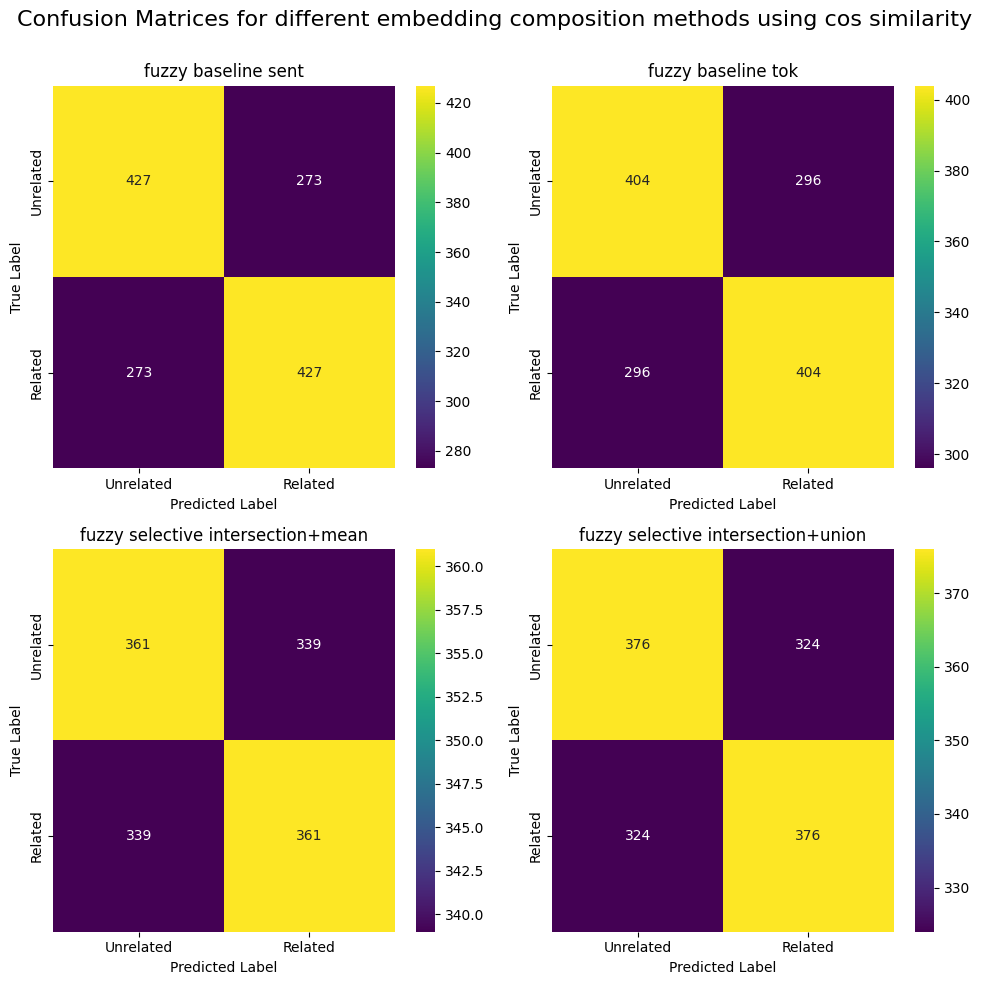

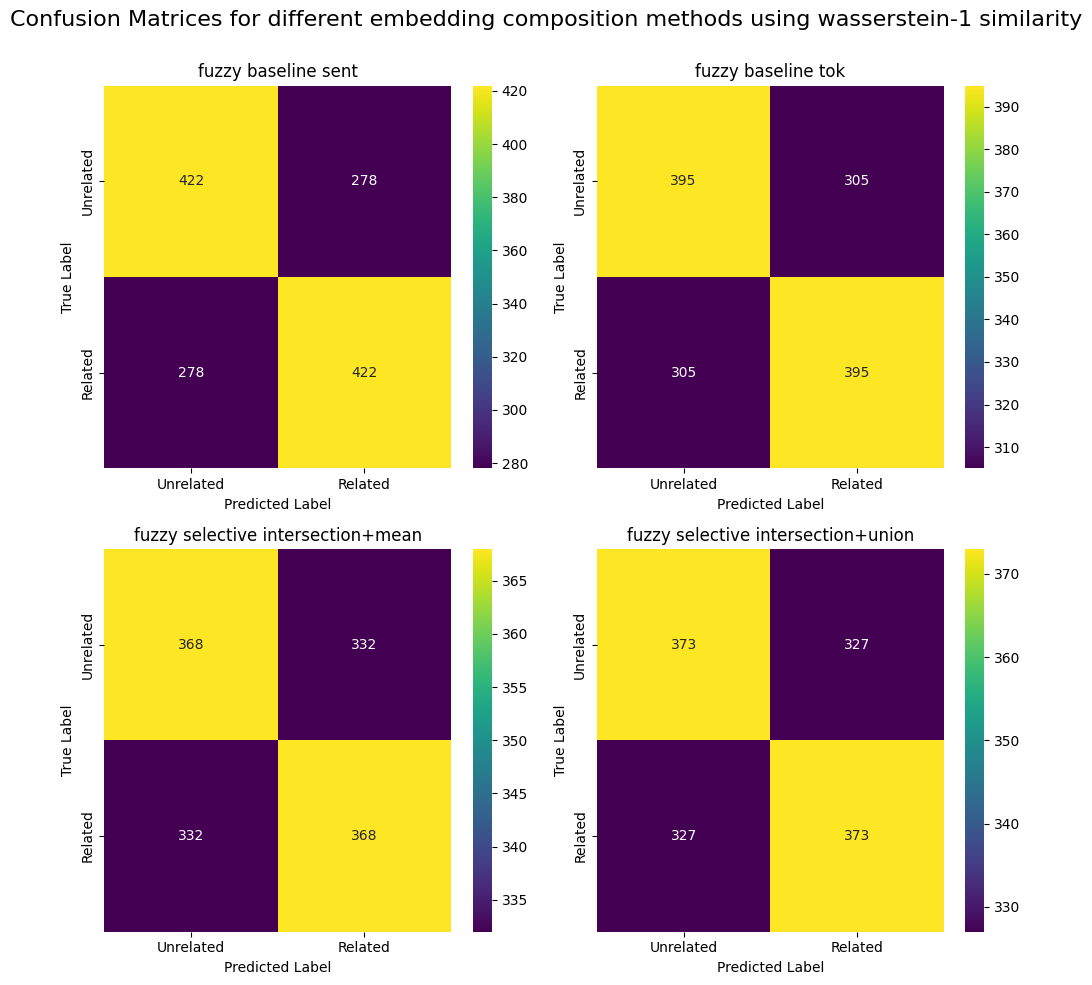

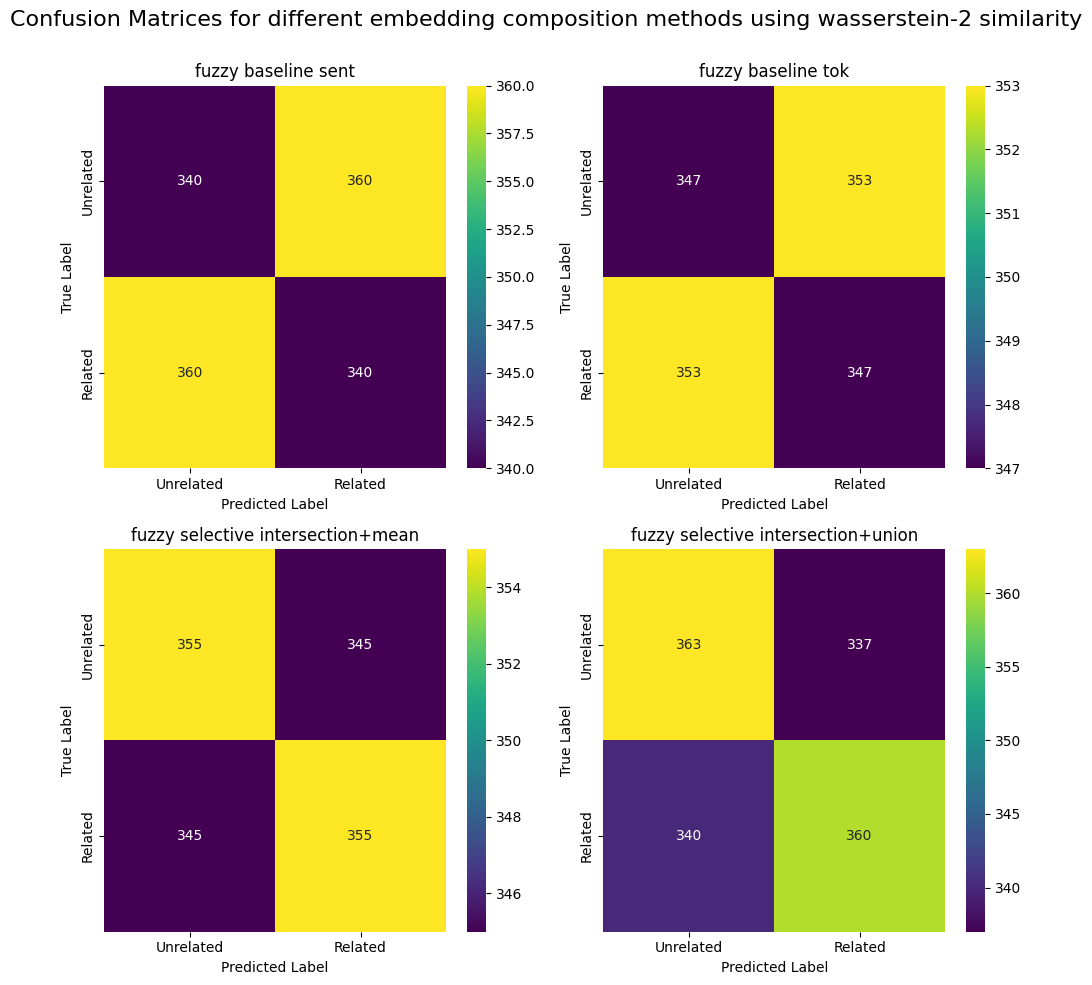

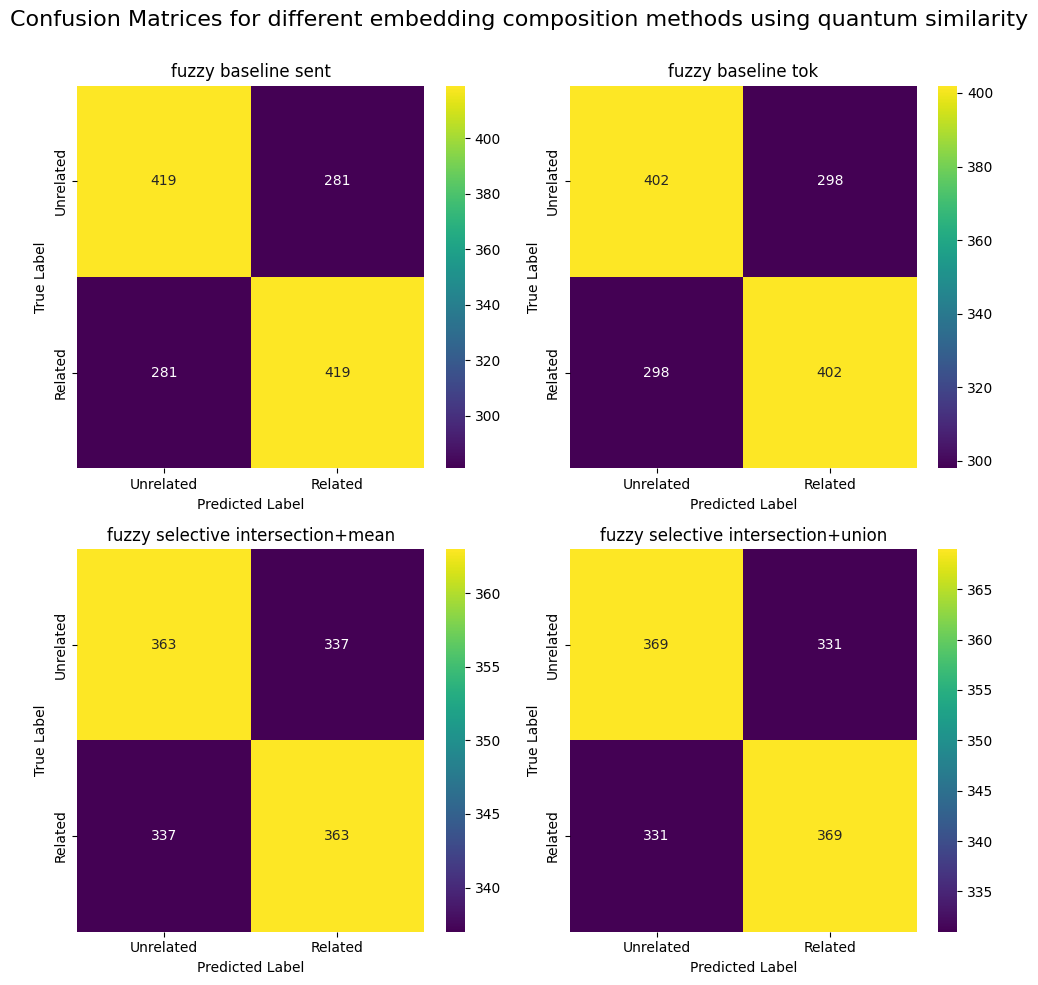

In [9]:
models = [
    "baseline_sent",
    "baseline_tok",
    "selective_intersection+mean",
    "selective_intersection+union",
]
metric_cols = []
for sim_metric in sim_metrics:
    metric_cols.extend([
        f"fuzzy_{model}_{sim_metric}_sim_pred"
        for model in models
    ])
eval_harness.plot_confusion_matrices(
    X=sim_eval_df[metric_cols],
    y=y_test
)

# Evaluation Results

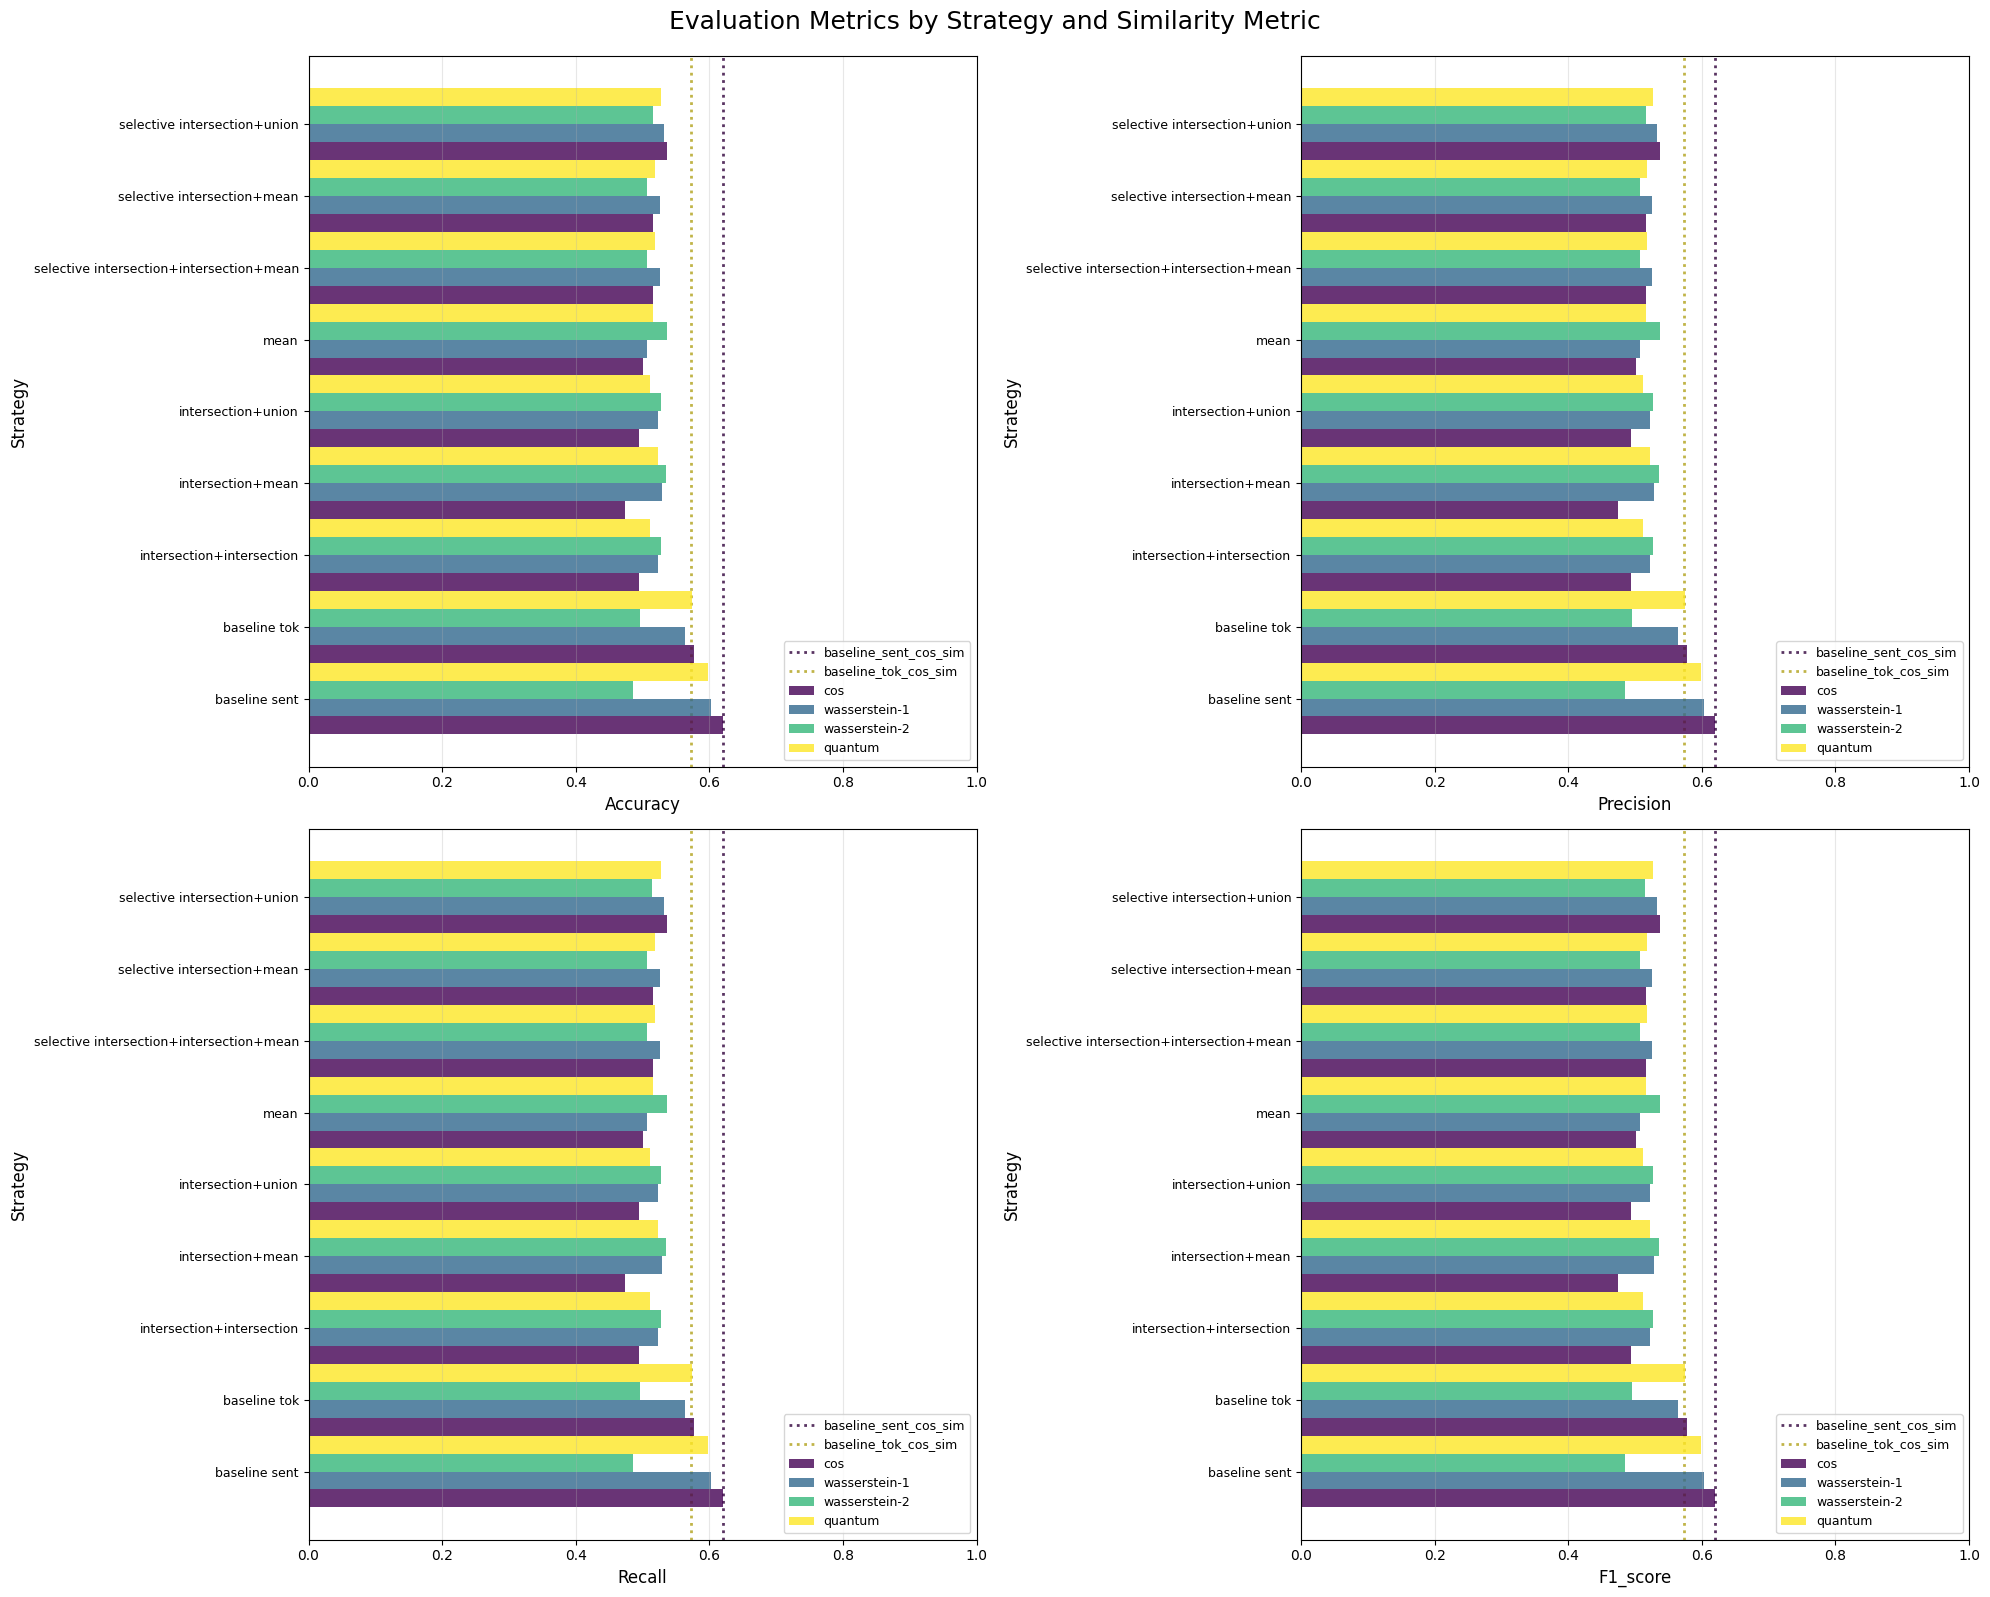

,strategy,similarity_metric,model,accuracy,precision,recall,f1_score
0,baseline_sent,cos,baseline_sent_cos_sim,0.620000,0.620000,0.620000,0.620000
1,baseline_sent,cos,fuzzy_baseline_sent_cos_sim,0.610000,0.610000,0.610000,0.610000
2,baseline_sent,wasserstein-1,fuzzy_baseline_sent_wasserstein-1_sim,0.602857,0.602857,0.602857,0.602857
3,baseline_sent,quantum,fuzzy_baseline_sent_quantum_sim,0.598571,0.598571,0.598571,0.598571
4,baseline_tok,cos,fuzzy_baseline_tok_cos_sim,0.577143,0.577143,0.577143,0.577143
5,baseline_tok,quantum,fuzzy_baseline_tok_quantum_sim,0.574286,0.574286,0.574286,0.574286
6,baseline_tok,cos,baseline_tok_cos_sim,0.572857,0.572857,0.572857,0.572857
7,baseline_tok,wasserstein-1,fuzzy_baseline_tok_wasserstein-1_sim,0.564286,0.564286,0.564286,0.564286
8,selective_intersection+union,cos,fuzzy_selective_intersection+union_cos_sim,0.537143,0.537143,0.537143,0.537143
9,mean,wasserstein-2,fuzzy_mean_wasserstein-2_sim,0.537143,0.537143,0.537143,0.537143


In [10]:
metrics_df = eval_harness.score(sim_eval_df, y_test)
metrics_df[:10]

In [11]:
metrics_df.to_csv(f"full_train_eval-wn_enriched={enrich_lemmas_with_wn}-n_components={n_components}-kernel_size={fuzzification_kernel_size}.tsv", sep="\t")